In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ncf = pd.read_csv("./SD_analysis_random_ncf.csv")
nk2 = pd.read_csv("./SD_analysis_random_nk2.csv")
nk3 = pd.read_csv("./SD_analysis_random_nk3.csv")
bbm = pd.read_csv("./SD_analysis_bbm-bnet-inputs-random.csv")
bbm_agg = bbm.copy()
bbm_agg["name"] = bbm_agg["name"].apply(lambda x: x.split("_")[0])
bbm_agg = bbm_agg.groupby("name").mean().reset_index()

In [3]:
frames = {
    "Nested Canalizing": ncf,
    "Critical NK (K=2)": nk2,
    "Critical NK (K=3)": nk3,
    "BBM (Aggregate)": bbm_agg,
}
network_type_colors = {
    "Nested Canalizing": "#228833",
    "Critical NK (K=2)": "#66ccee",
    "Critical NK (K=3)": "#4477aa",
    "BBM (Aggregate)": "#aa3377",
}

In [4]:
bbm_agg.head()

,name,N,sd size,depth,minimal trapspaces,attractors,motif-avoidant-attractors
0,001,321.0,1.031250,0.015625,1.015625,1.015625,0.0
1,002,139.0,40125.830769,16.703125,303.111111,312.619469,0.0
2,003,20.0,2.000000,0.500000,1.500000,1.500000,0.0
3,004,247.0,NaN,NaN,NaN,NaN,NaN
4,005,28.0,7.000000,4.000000,1.000000,1.000000,0.0


In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import bootstrap
from scipy.stats import iqr
from scipy.stats import kurtosis

def get_bootstrap(of_interest, statistics, log):
    fig, ax = plt.subplots(4, 3)
    fig.set_size_inches(10, 20)

    fig.suptitle(f'{statistics.__name__} of {of_interest} {log=}', fontsize=16, y=0.91)


    row = 0
    for name, df in frames.items():

        data = np.array(df.loc[:,of_interest])
        data = data[~np.isnan(data)]

        if log:
            array = np.log2(data)
        else:
            array = data

        var_sample = statistics(array)  # the sample statistic


        print(f"{of_interest} {statistics.__name__} {log=} of {name}, {var_sample}")

        res_BCa = bootstrap((array,), statistics, confidence_level=0.95)
        res_per = bootstrap((array,), statistics, confidence_level=0.95, method="percentile")
        res_bas = bootstrap((array,), statistics, confidence_level=0.95, method="basic")


        print(f"95% interval (BCa), {res_BCa.confidence_interval.low}, {res_BCa.confidence_interval.high}")
        print(f"95% interval (percentile), {res_per.confidence_interval.low}, {res_per.confidence_interval.high}")
        print(f"95% interval (basic), {res_bas.confidence_interval.low}, {res_bas.confidence_interval.high}\n")


        if statistics == iqr and log==False and name != "BBM (Aggregate)":
            bin_BCa = range(math.floor(min(res_BCa.bootstrap_distribution)), math.ceil(max(res_BCa.bootstrap_distribution))+1)
            bin_per = range(math.floor(min(res_per.bootstrap_distribution)), math.ceil(max(res_per.bootstrap_distribution))+1)
            bin_bas = range(math.floor(min(res_bas.bootstrap_distribution)), math.ceil(max(res_bas.bootstrap_distribution))+1)
            ax[row, 0].hist(res_BCa.bootstrap_distribution, bins=bin_BCa)
            ax[row, 1].hist(res_per.bootstrap_distribution, bins=bin_per)
            ax[row, 2].hist(res_bas.bootstrap_distribution, bins=bin_bas)
        else:
            ax[row, 0].hist(res_BCa.bootstrap_distribution)
            ax[row, 1].hist(res_per.bootstrap_distribution)
            ax[row, 2].hist(res_bas.bootstrap_distribution)


        ax[row, 0].set_ylabel(f'frequency for {name}')

        if row == 0:
            ax[row, 0].set_title(f'Bootstrap (BCa)')
            ax[row, 1].set_title(f'Bootstrap (percentile)')
            ax[row, 2].set_title(f'Bootstrap (basic)')
        
        if row == 3:
            ax[row, 0].set_xlabel(f'{statistics.__name__} of {of_interest} {log=}')
            ax[row, 1].set_xlabel(f'{statistics.__name__} of {of_interest} {log=}')
            ax[row, 2].set_xlabel(f'{statistics.__name__} of {of_interest} {log=}')
            
        row+=1

    plt.show()

sd size mean log=True of Nested Canalizing, 2.0122934600763887
95% interval (BCa), 1.9953040689835888, 2.0287905918356244
95% interval (percentile), 1.9957995234482129, 2.028722341353235
95% interval (basic), 1.9956873780730686, 2.02891340413756

sd size mean log=True of Critical NK (K=2), 1.6963469489170073
95% interval (BCa), 1.679166514155212, 1.713685495821794
95% interval (percentile), 1.679056178693307, 1.7140163309741259
95% interval (basic), 1.6794454741356943, 1.7140894427785813

sd size mean log=True of Critical NK (K=3), 1.760494283295972
95% interval (BCa), 1.7430887953627268, 1.7773899789630097
95% interval (percentile), 1.7430111235426309, 1.7770546745236733
95% interval (basic), 1.743268059094345, 1.7782360846533223

sd size mean log=True of BBM (Aggregate), 2.410292750677009
95% interval (BCa), 2.075212109899738, 2.8038844535369427
95% interval (percentile), 2.0517646254573862, 2.7823175938849696
95% interval (basic), 2.0320109004824096, 2.752820378014684



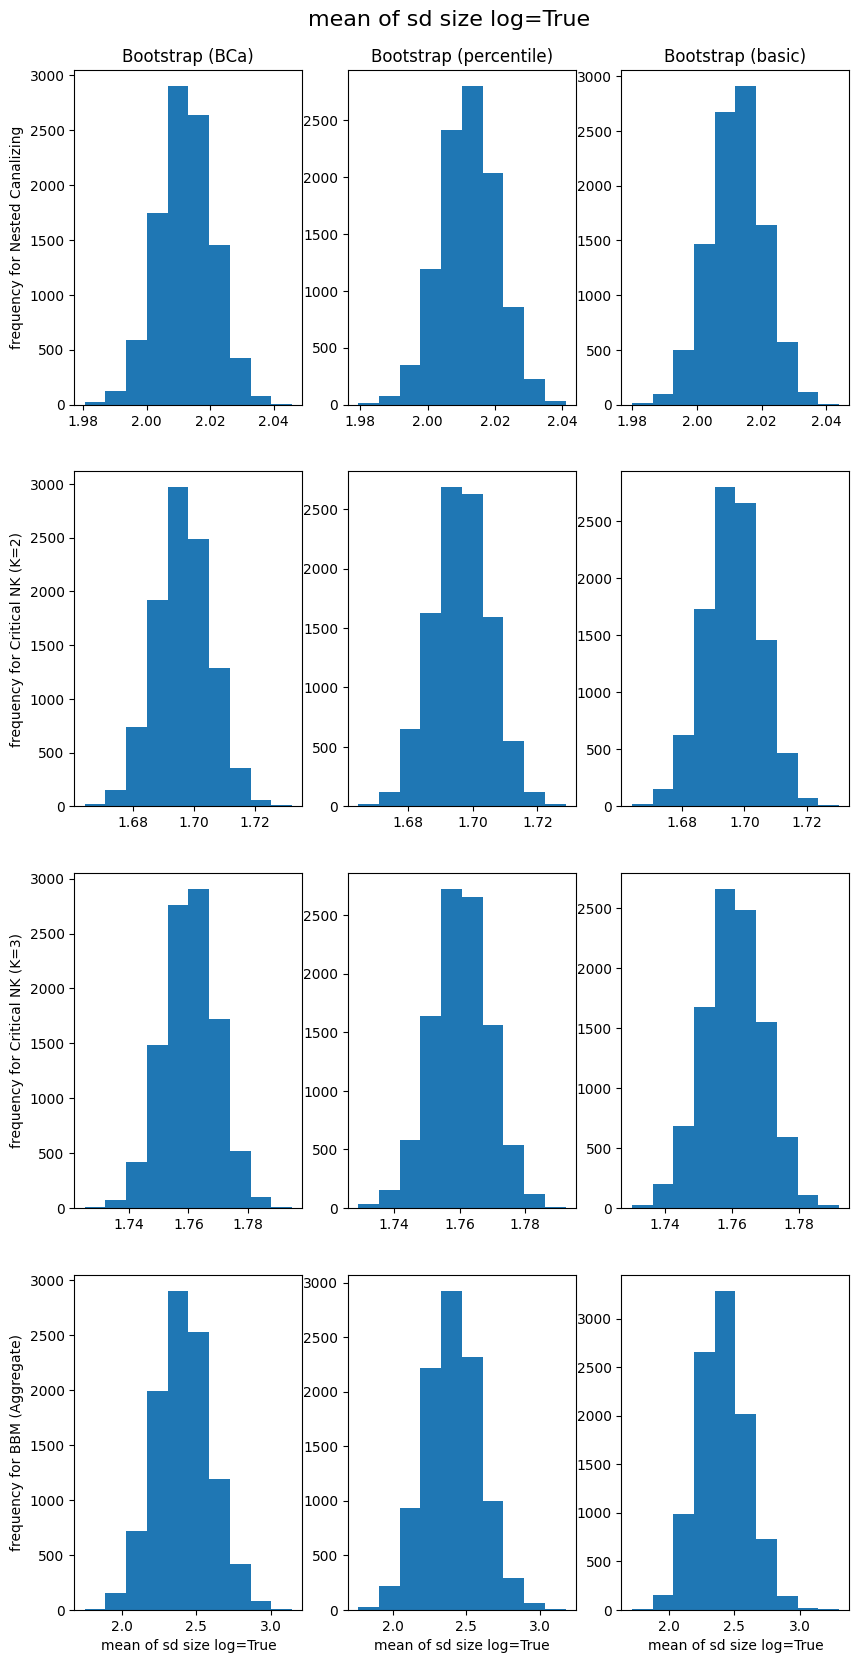

In [6]:
get_bootstrap(of_interest="sd size", statistics=np.mean, log=True)

attractors mean log=True of Nested Canalizing, 0.8954813486551075
95% interval (BCa), 0.8834751989036262, 0.9070541462403199
95% interval (percentile), 0.883547194841269, 0.9071395468720811
95% interval (basic), 0.8840500690674694, 0.9072113380243603

attractors mean log=True of Critical NK (K=2), 0.7830431642048903
95% interval (BCa), 0.7716292289686345, 0.7944234038268104
95% interval (percentile), 0.7716150884220241, 0.7944577317440353
95% interval (basic), 0.7717067559274998, 0.7944405777393146

attractors mean log=True of Critical NK (K=3), 0.6733108067812377
95% interval (BCa), 0.663149013746801, 0.6840841981536568
95% interval (percentile), 0.6628665432019631, 0.683636729821358
95% interval (basic), 0.6628300630944123, 0.6840917991068096

attractors mean log=True of BBM (Aggregate), 1.2519652746911711
95% interval (BCa), 1.0589474629431768, 1.486384321059277
95% interval (percentile), 1.0493062997321465, 1.4634897650650354
95% interval (basic), 1.0340978326789956, 1.451618526972

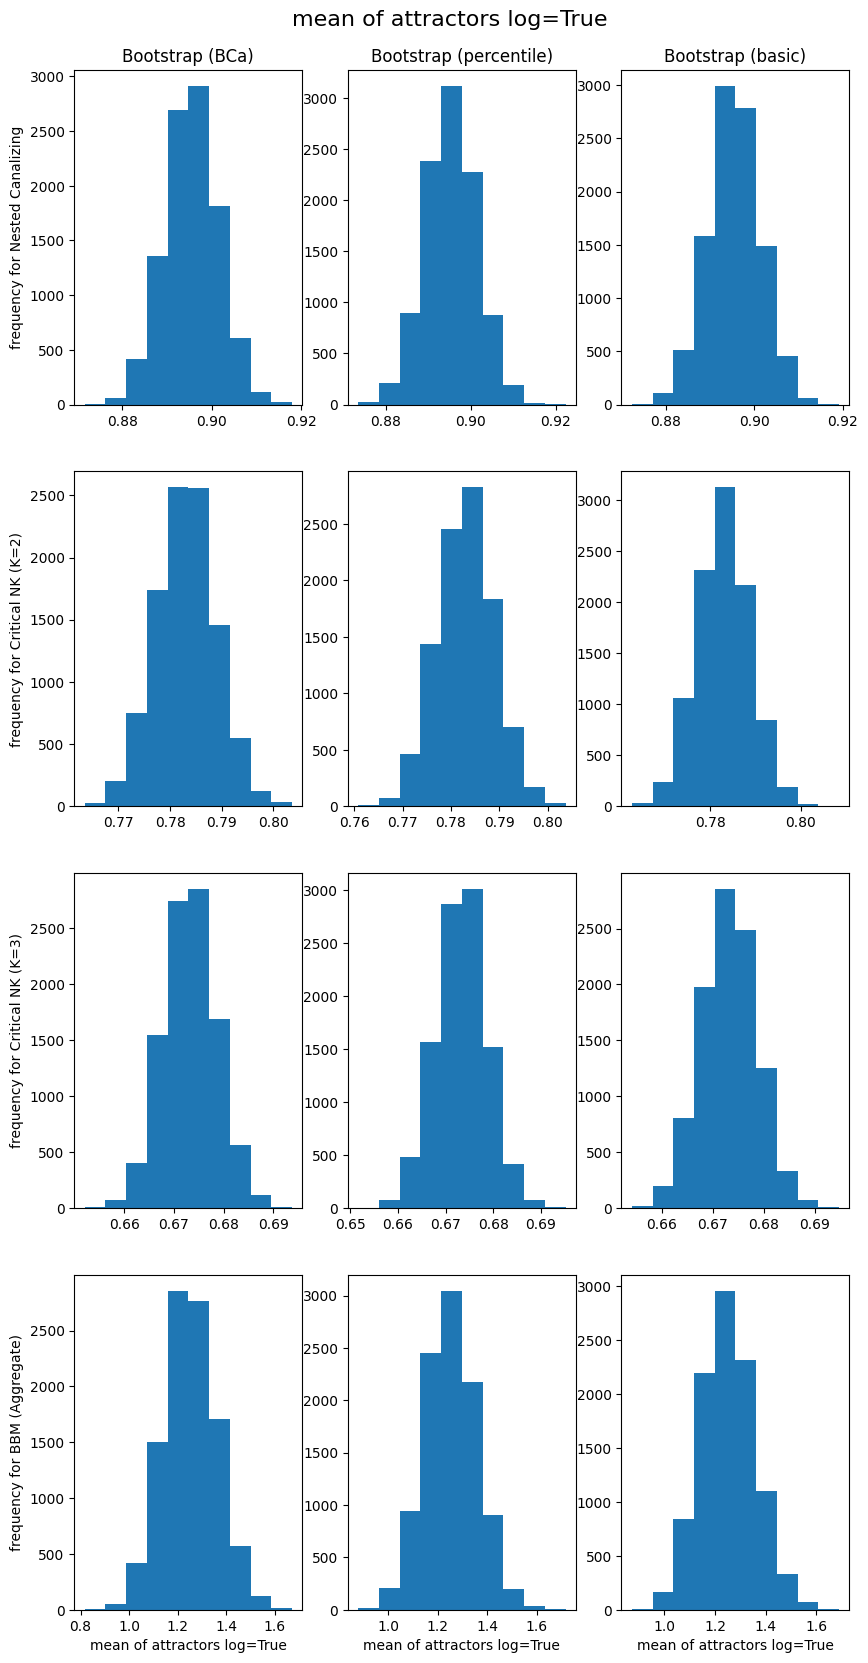

In [7]:
get_bootstrap(of_interest="attractors", statistics=np.mean, log=True)

sd size var log=True of Nested Canalizing, 1.6408732985452632
95% interval (BCa), 1.6083686808171382, 1.6740940057963254
95% interval (percentile), 1.6078676889996089, 1.673421473141681
95% interval (basic), 1.6074947367455303, 1.6736755735222715

sd size var log=True of Critical NK (K=2), 1.7839250319954716
95% interval (BCa), 1.7501206624113448, 1.8210639426117368
95% interval (percentile), 1.7488599527563187, 1.8190896392766125
95% interval (basic), 1.748277465323607, 1.8183162712242524

sd size var log=True of Critical NK (K=3), 1.7783503606806943
95% interval (BCa), 1.7444298660567528, 1.8149011496471434
95% interval (percentile), 1.7438009878665677, 1.8138823564912128
95% interval (basic), 1.7436296369822901, 1.8137198207318546

sd size var log=True of BBM (Aggregate), 7.858870468492553
95% interval (BCa), 5.591015425475226, 11.417692638328452
95% interval (percentile), 5.2164779970994335, 10.82466847545053
95% interval (basic), 4.95515306452552, 10.497673353670478



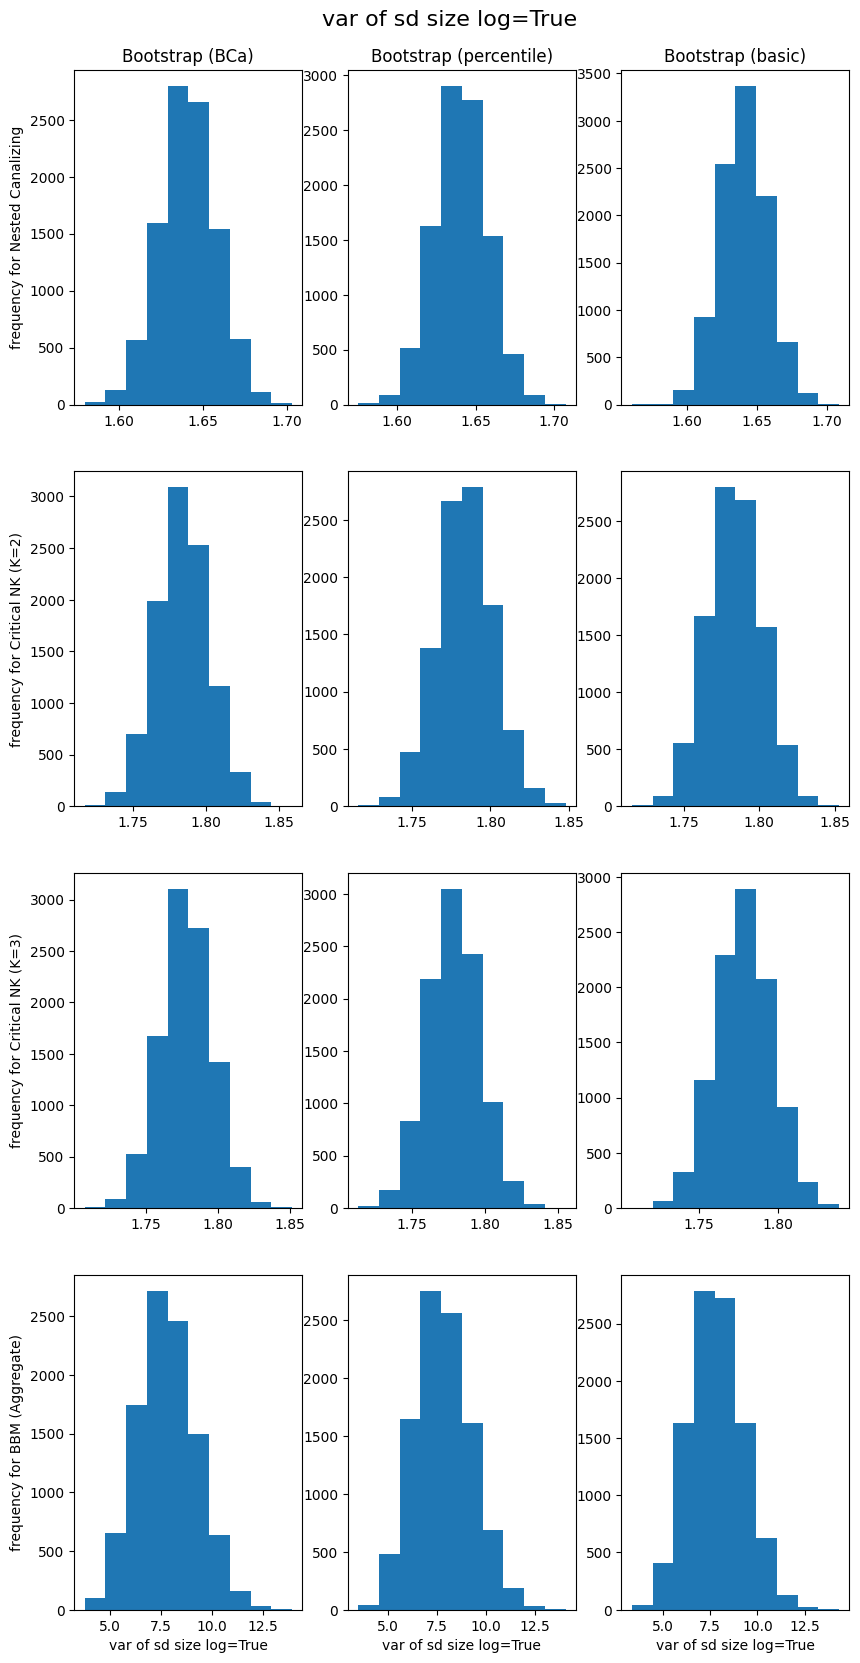

In [8]:
get_bootstrap(of_interest="sd size", statistics=np.var, log=True)

attractors var log=True of Nested Canalizing, 0.8052905810738198
95% interval (BCa), 0.7894905795192808, 0.8219996546453103
95% interval (percentile), 0.7896895586786105, 0.8217365037595585
95% interval (basic), 0.7888376641381643, 0.8214514481488433

attractors var log=True of Critical NK (K=2), 0.7695839463808435
95% interval (BCa), 0.7536706481349817, 0.7865945917938534
95% interval (percentile), 0.7536009843855018, 0.7862726541228188
95% interval (basic), 0.7528449610624594, 0.786098257801217

attractors var log=True of Critical NK (K=3), 0.6678419395390728
95% interval (BCa), 0.654293508769256, 0.6823409237754624
95% interval (percentile), 0.6536133367596547, 0.6822479806495727
95% interval (basic), 0.6534829885072242, 0.6820344548033525

attractors var log=True of BBM (Aggregate), 2.590949499681285
95% interval (BCa), 1.878817199156944, 3.7974509217019734
95% interval (percentile), 1.7372871834912533, 3.523987143066067
95% interval (basic), 1.6447346857014615, 3.4241424126449886


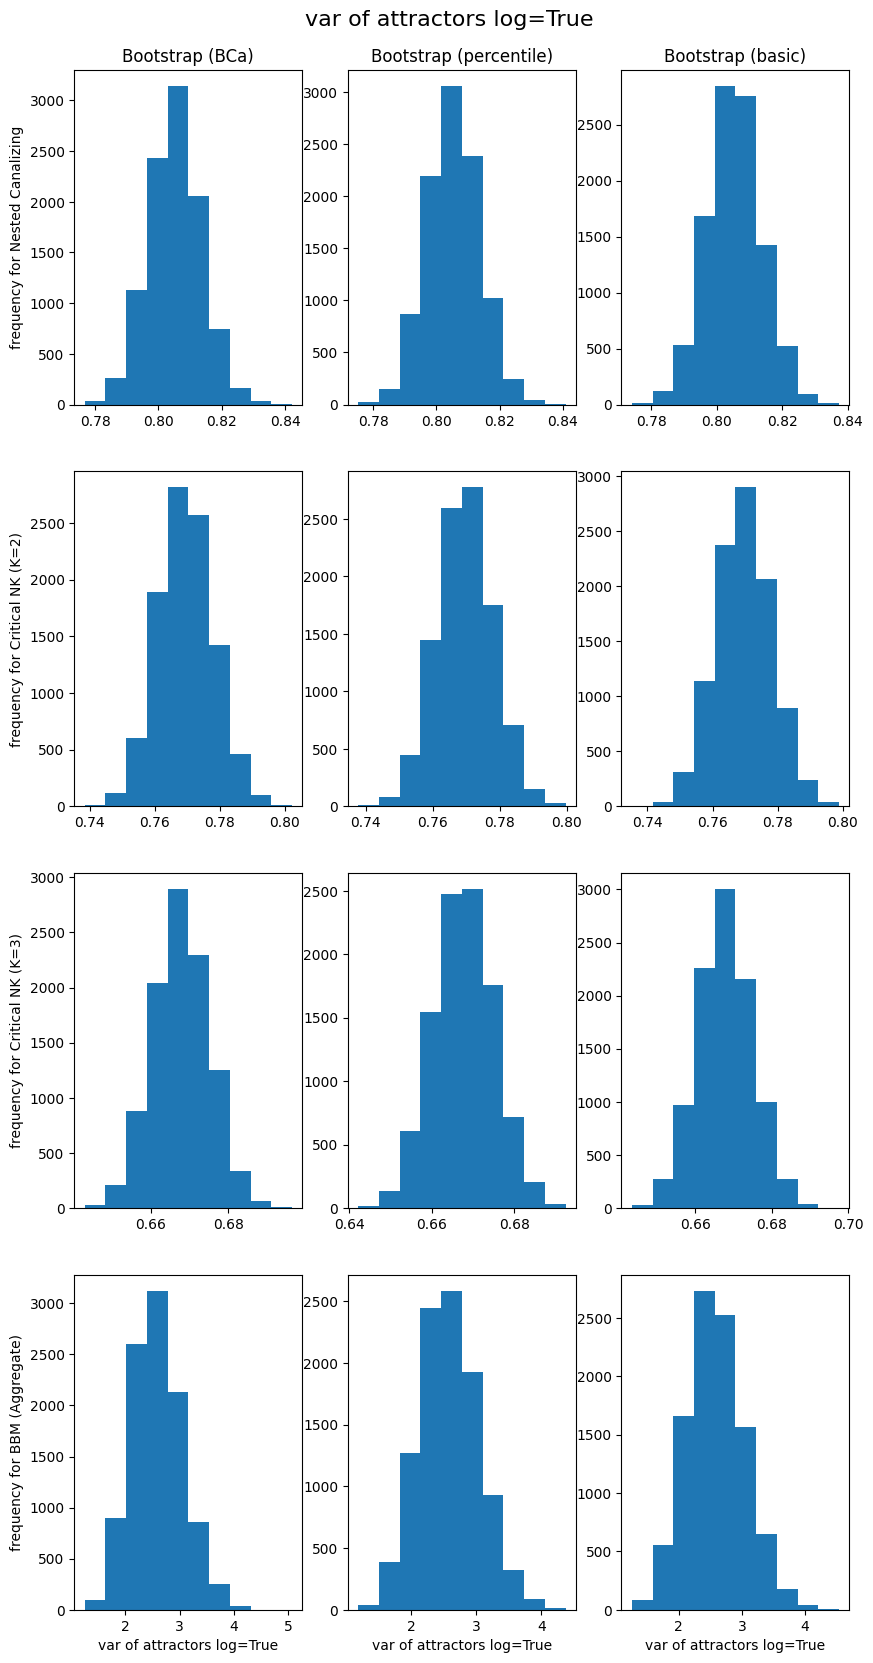

In [9]:
get_bootstrap(of_interest="attractors", statistics=np.var, log=True)

sd size kurtosis log=True of Nested Canalizing, 0.40999509622418984
95% interval (BCa), 0.27652498882804827, 0.6223171826312973
95% interval (percentile), 0.254808368140839, 0.5858283788641765
95% interval (basic), 0.22627228045343528, 0.5651995150467081

sd size kurtosis log=True of Critical NK (K=2), 0.35835652121711803
95% interval (BCa), 0.22711517293819686, 0.5321829043151977
95% interval (percentile), 0.21472108166107562, 0.5150902149201678
95% interval (basic), 0.20567201488209752, 0.5015050727752367

sd size kurtosis log=True of Critical NK (K=3), 0.3431940363827768
95% interval (BCa), 0.20788359691985325, 0.5425610467814401
95% interval (percentile), 0.19072798328926663, 0.5119009524740161
95% interval (basic), 0.16722376607453282, 0.4953232137270992

sd size kurtosis log=True of BBM (Aggregate), 5.681449757056173
95% interval (BCa), 3.4639064367463086, 8.819085317747888
95% interval (percentile), 3.1034030430909816, 8.46268545193119
95% interval (basic), 3.008232670613955, 8.

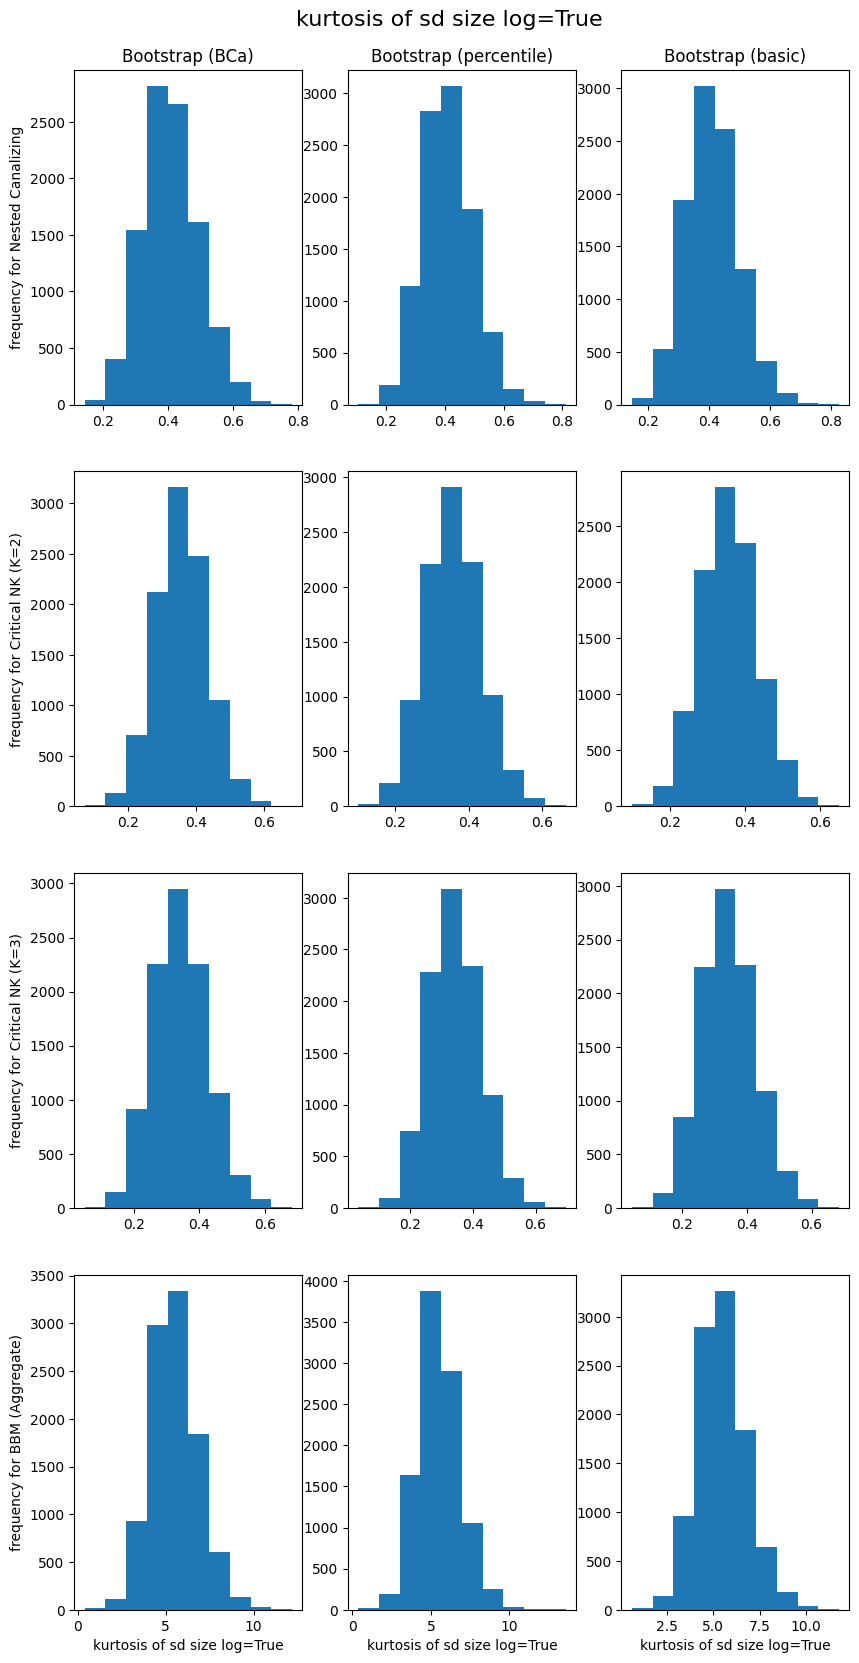

In [10]:
get_bootstrap(of_interest="sd size", statistics=kurtosis, log=True)

attractors kurtosis log=True of Nested Canalizing, 0.3892070546168762
95% interval (BCa), 0.19332280469643764, 0.7325235415341552
95% interval (percentile), 0.16074110627568802, 0.6659439793834117
95% interval (basic), 0.12220851406843902, 0.6234856678179631

attractors kurtosis log=True of Critical NK (K=2), 0.7426623414893263
95% interval (BCa), 0.5631388181178912, 0.9863533505416946
95% interval (percentile), 0.5383181926749853, 0.9596033982469621
95% interval (basic), 0.5285199611514514, 0.9430359194468491

attractors kurtosis log=True of Critical NK (K=3), 0.7554362472061111
95% interval (BCa), 0.5937686212724494, 0.9900603013308117
95% interval (percentile), 0.5705729719291459, 0.9520057070100595
95% interval (basic), 0.555436296850387, 0.9416358461386267

attractors kurtosis log=True of BBM (Aggregate), 5.170157180077993
95% interval (BCa), 2.9817929158929752, 9.511753919992193
95% interval (percentile), 2.2537848690506332, 8.077261625016307
95% interval (basic), 2.2833832397514

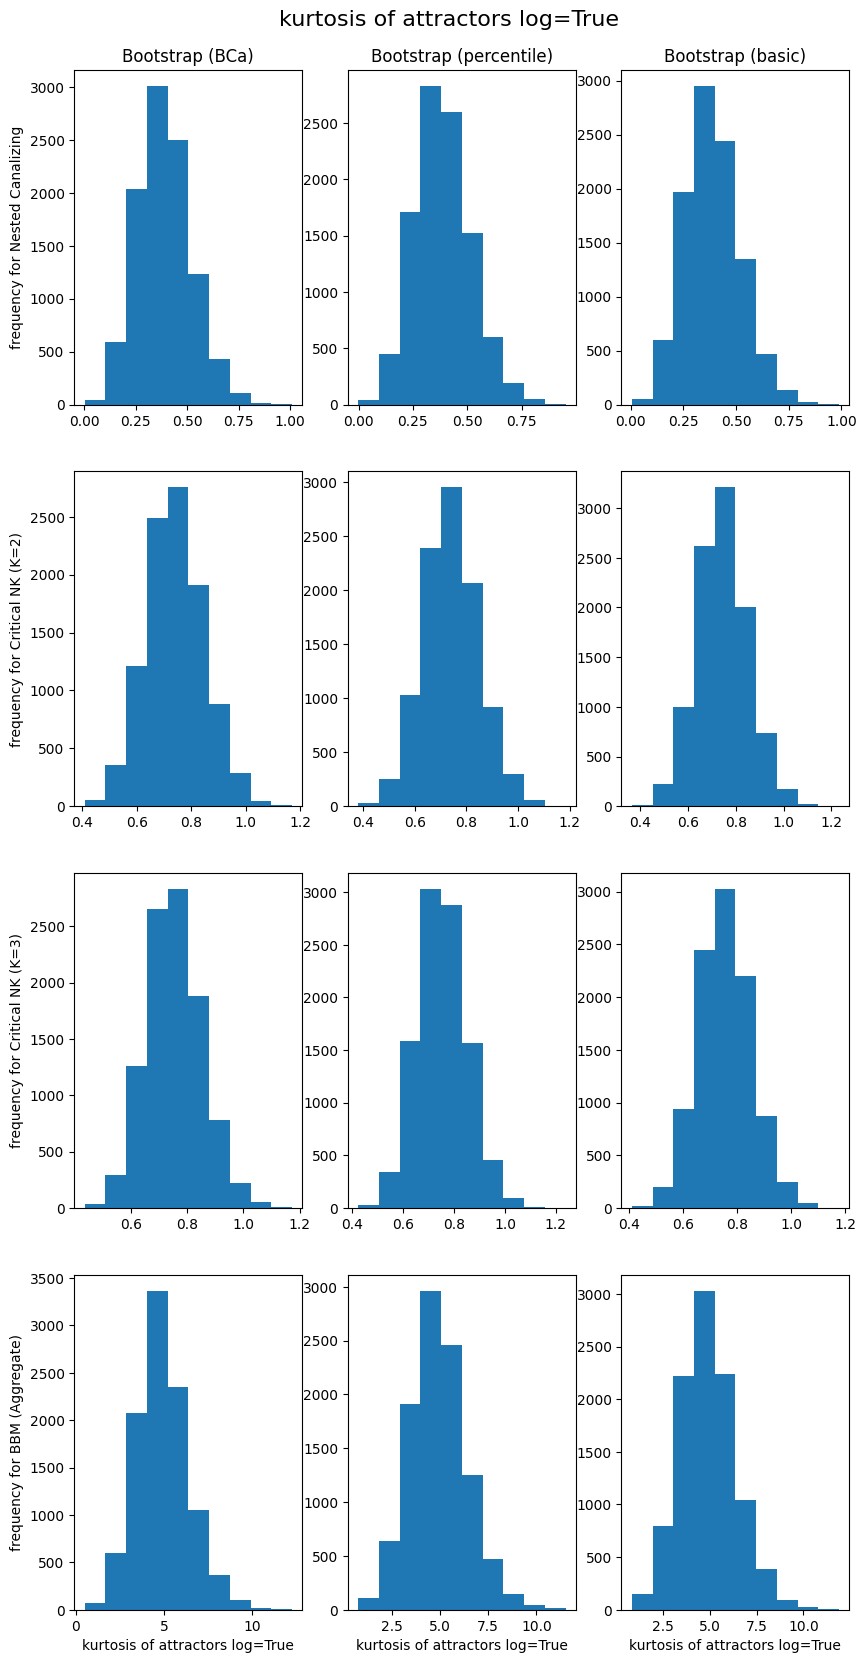

In [11]:
get_bootstrap(of_interest="attractors", statistics=kurtosis, log=True)

sd size mean log=False of Nested Canalizing, 6.426695652173913
95% interval (BCa), 6.284767599644531, 6.613417532843938
95% interval (percentile), 6.27625, 6.593184782608696
95% interval (basic), 6.258213043478261, 6.576871739130434

sd size mean log=False of Critical NK (K=2), 5.500173913043478
95% interval (BCa), 5.370304347826087, 5.652138589996546
95% interval (percentile), 5.362997826086957, 5.642654347826086
95% interval (basic), 5.355245652173913, 5.638565217391305

sd size mean log=False of Critical NK (K=3), 5.718739130434782
95% interval (BCa), 5.5828941151325315, 5.90104744798251
95% interval (percentile), 5.572336956521739, 5.877654347826087
95% interval (basic), 5.555454347826087, 5.8696652173913035

sd size mean log=False of BBM (Aggregate), 519.7116986591175
95% interval (BCa), 189.14636977904334, 1318.1370591195214
95% interval (percentile), 103.82828637420462, 1077.1351262195724
95% interval (basic), -41.53806978978355, 935.8609093639398



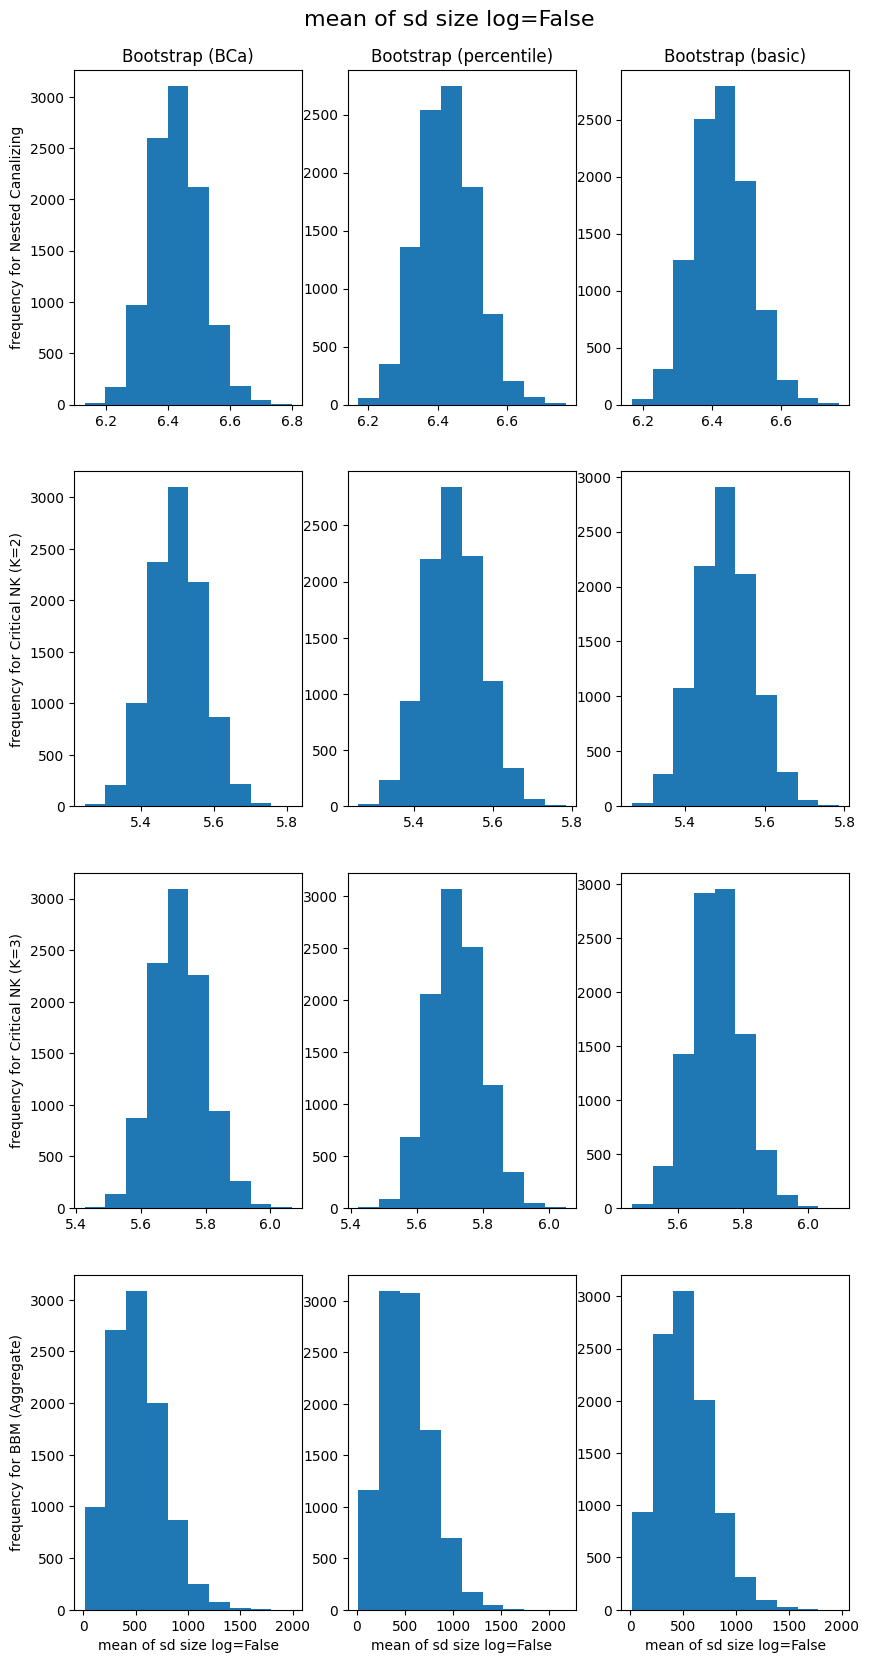

In [12]:
get_bootstrap(of_interest="sd size", statistics=np.mean, log=False)